#FESMARO 2025 - Statistika dan Sains Data - Big Data Analysis
##Prediksi Keterlambatan Pengiriman pada DataCo Smart Supply Chain Menggunakan Machine Learning

###**Nama Tim:** PNJoy

###**Nama Anggota:**

###1. Syifa Azzahirah - 2207411024
###2. Deva Alvyn Budinugraha - 2207411050
###3. Nabil Falih Khairullah - 2107411060

###**Asal Instansi:** Politeknik Negeri Jakarta

Data Source: https://www.kaggle.com/datasets/shashwatwork/dataco-smart-supply-chain-for-big-data-analysis/data



---



##📍 Latar Belakang:
Dalam industri rantai pasok (*supply chain*), keterlambatan pengiriman dapat menyebabkan ketidakpuasan pelanggan, peningkatan biaya operasional, dan penurunan efisiensi logistik. Oleh karena itu, perusahaan perlu memiliki sistem prediksi keterlambatan yang dapat membantu dalam pengambilan keputusan operasional.

Dataset DataCo Smart Supply Chain menyediakan data historis terkait pesanan, pengiriman, dan faktor lainnya yang memungkinkan kita memprediksi risiko keterlambatan pengiriman menggunakan teknik Machine Learning.

##📍 Tujuan Proyek:
1. Menganalisis faktor-faktor utama yang mempengaruhi keterlambatan pengiriman.

2. Membangun model Machine Learning untuk memprediksi apakah sebuah pesanan akan mengalami keterlambatan atau tidak.

3. Memberikan insight dan rekomendasi bagi perusahaan untuk mengurangi risiko keterlambatan dan meningkatkan efisiensi rantai pasok.



---



#1. Data Preparation

##1. 1. Import Libraries

In [ ]:
# Impor libraries yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore")
print("Libraries yang dibutuhkan berhasil diimpor!")

Libraries yang dibutuhkan berhasil diimpor!


##1. 2. Read the Dataset

In [ ]:
# Masukkan File ID dari Google Drive
file_id = "1XdfHg6w0ONjqT4F9TPrCBSH464uEVqsG"

# Buat URL untuk download file CSV dari Google Drive
file_url = f"https://drive.google.com/uc?id={file_id}"

# Baca dataset langsung dari Google Drive
df = pd.read_csv(file_url, encoding='unicode_escape')

# Tampilkan 5 baris pertama
df.head()

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Benefit per order  Sales per customer   Delivery Status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   Late_delivery_risk  Category Id   Category Name Customer City  ...  \
0                   0           73  Sporting Goods        Caguas  ...   
1                   1           73  Sporting Goods        Caguas  ...   
2                   0           73  Sporting Goods      San Jose  ...   
3                   0           73  Sporting Goods   Los Angeles  ...   
4                   0           73  Sporting Goods        Caguas  ...   

  Order Zipcode Product Card Id Product Category Id  Product Description  \
0           NaN            1360                  73                  NaN   
1           NaN            1360                  73                  NaN   
2           NaN            1360                  73                  NaN   
3           NaN            1360                  73                  NaN   
4           NaN            1360                  73                  NaN   

                                  Product Image  Product Name Product Price  \
0  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
1  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
2  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
3  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
4  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   

  Product Status shipping date (DateOrders)   Shipping Mode  
0              0             2/3/2018 22:56  Standard Class  
1              0            1/18/2018 12:27  Standard Class  
2              0            1/17/2018 12:06  Standard Class  
3              0            1/16/2018 11:45  Standard Class  
4              0            1/15/2018 11:24  Standard Class  

[5 rows x 53 columns]

In [ ]:
df.shape

(180519, 53)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

##1. 3. Data Cleaning, Handling Missing Values, Transformation

In [ ]:
df.loc[100]

Type                                                                      TRANSFER
Days for shipping (real)                                                         4
Days for shipment (scheduled)                                                    4
Benefit per order                                                             67.5
Sales per customer                                                           225.0
Delivery Status                                                   Shipping on time
Late_delivery_risk                                                               0
Category Id                                                                     24
Category Name                                                      Women's Apparel
Customer City                                                               Caguas
Customer Country                                                       Puerto Rico
Customer Email                                                           XXXXXXXXX
Customer Fname                                                           Alexander
Customer Id                                                                   6543
Customer Lname                                                               Smith
Customer Password                                                        XXXXXXXXX
Customer Segment                                                          Consumer
Customer State                                                                  PR
Customer Street                                          7958 Thunder Apple Street
Customer Zipcode                                                             725.0
Department Id                                                                    5
Department Name                                                               Golf
Latitude                                                                 18.279205
Longitude                                                               -66.370552
Market                                                                       LATAM
Order City                                                                   Tepic
Order Country                                                               México
Order Customer Id                                                             6543
order date (DateOrders)                                              2/5/2017 1:01
Order Id                                                                     52478
Order Item Cardprod Id                                                         502
Order Item Discount                                                           25.0
Order Item Discount Rate                                                       0.1
Order Item Id                                                               131161
Order Item Product Price                                                      50.0
Order Item Profit Ratio                                                        0.3
Order Item Quantity                                                              5
Sales                                                                        250.0
Order Item Total                                                             225.0
Order Profit Per Order                                                        67.5
Order Region                                                       Central America
Order State                                                                Nayarit
Order Status                                                               PENDING
Order Zipcode                                                                  NaN
Product Card Id                                                                502
Product Category Id                                                             24
Product Description                                                            NaN
Product Image                    http://images.acmesports.sports/Nike+Men%27s+D...
Product Name    

In [ ]:
df.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0
Order City                            0
Order Country                         0
Order Customer Id                     0
order date (DateOrders)               0
Order Id                              0
Order Item Cardprod Id                0
Order Item Discount                   0
Order Item Discount Rate              0
Order Item Id                         0
Order Item Product Price              0
Order Item Profit Ratio               0
Order Item Quantity                   0
Sales                                 0
Order Item Total                      0
Order Profit Per Order                0
Order Region                          0
Order State                           0
Order Status                          0
Order Zipcode                    155679
Product Card Id                       0
Product Category Id                   0
Product Description              180519
Product Image                         0
Product Name                          0
Product Price                         0
Product Status                        0
shipping date (DateOrders)            0
Shipping Mode                         0
dtype: int64

In [ ]:
# Menghapus kolom yang tidak relevan
df.drop(columns=['Product Description', 'Order Zipcode'], inplace=True)

# Menghapus baris yang memiliki nilai kosong di Customer Zipcode
df.drop(df[df['Customer Zipcode'].isna()].index, inplace=True)

In [ ]:
# Menghapus kolom yang tidak relevan untuk prediksi keterlambatan
columns_to_drop = [
    "Customer Email", "Customer Fname", "Customer Lname", "Customer Password", "Customer Street",
    "Category Id", "Order Customer Id", "Benefit per order", "Sales per customer", "Order Item Product Price",
    "Order Item Cardprod Id", "Product Image", "Product Status", "Order Item Id"
]
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
# Pastikan data sudah tidak memiliki nilai null
df.isnull().sum()

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Delivery Status                  0
Late_delivery_risk               0
Category Name                    0
Customer City                    0
Customer Country                 0
Customer Id                      0
Customer Segment                 0
Customer State                   0
Customer Zipcode                 0
Department Id                    0
Department Name                  0
Latitude                         0
Longitude                        0
Market                           0
Order City                       0
Order Country                    0
order date (DateOrders)          0
Order Id                         0
Order Item Discount              0
Order Item Discount Rate         0
Order Item Profit Ratio          0
Order Item Quantity              0
Sales                            0
Order Item Total                 0
Order Profit Per Order           0
Order Region                     0
Order State                      0
Order Status                     0
Product Card Id                  0
Product Category Id              0
Product Name                     0
Product Price                    0
shipping date (DateOrders)       0
Shipping Mode                    0
dtype: int64

In [ ]:
df.head()

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

    Delivery Status  Late_delivery_risk   Category Name Customer City  \
0  Advance shipping                   0  Sporting Goods        Caguas   
1     Late delivery                   1  Sporting Goods        Caguas   
2  Shipping on time                   0  Sporting Goods      San Jose   
3  Advance shipping                   0  Sporting Goods   Los Angeles   
4  Advance shipping                   0  Sporting Goods        Caguas   

  Customer Country  Customer Id Customer Segment  ... Order Profit Per Order  \
0      Puerto Rico        20755         Consumer  ...              91.250000   
1      Puerto Rico        19492         Consumer  ...            -249.089996   
2          EE. UU.        19491         Consumer  ...            -247.779999   
3          EE. UU.        19490      Home Office  ...              22.860001   
4      Puerto Rico        19489        Corporate  ...             134.210007   

     Order Region      Order State     Order Status  Product Card Id  \
0  Southeast Asia  Java Occidental         COMPLETE             1360   
1      South Asia         Rajastán          PENDING             1360   
2      South Asia         Rajastán           CLOSED             1360   
3         Oceania       Queensland         COMPLETE             1360   
4         Oceania       Queensland  PENDING_PAYMENT             1360   

   Product Category Id  Product Name Product Price shipping date (DateOrders)  \
0                   73  Smart watch         327.75             2/3/2018 22:56   
1                   73  Smart watch         327.75            1/18/2018 12:27   
2                   73  Smart watch         327.75            1/17/2018 12:06   
3                   73  Smart watch         327.75            1/16/2018 11:45   
4                   73  Smart watch         327.75            1/15/2018 11:24   

    Shipping Mode  
0  Standard Class  
1  Standard Class  
2  Standard Class  
3  Standard Class  
4  Standard Class  

[5 rows x 37 columns]

In [ ]:
df.loc[100]

Type                                                         TRANSFER
Days for shipping (real)                                            4
Days for shipment (scheduled)                                       4
Delivery Status                                      Shipping on time
Late_delivery_risk                                                  0
Category Name                                         Women's Apparel
Customer City                                                  Caguas
Customer Country                                          Puerto Rico
Customer Id                                                      6543
Customer Segment                                             Consumer
Customer State                                                     PR
Customer Zipcode                                                725.0
Department Id                                                       5
Department Name                                                  Golf
Latitude                                                    18.279205
Longitude                                                  -66.370552
Market                                                          LATAM
Order City                                                      Tepic
Order Country                                                  México
order date (DateOrders)                                 2/5/2017 1:01
Order Id                                                        52478
Order Item Discount                                              25.0
Order Item Discount Rate                                          0.1
Order Item Profit Ratio                                           0.3
Order Item Quantity                                                 5
Sales                                                           250.0
Order Item Total                                                225.0
Order Profit Per Order                                           67.5
Order Region                                          Central America
Order State                                                   Nayarit
Order Status                                                  PENDING
Product Card Id                                                   502
Product Category Id                                                24
Product Name                     Nike Men's Dri-FIT Victory Golf Polo
Product Price                                                    50.0
shipping date (DateOrders)                              2/9/2017 1:01
Shipping Mode                                          Standard Class
Name: 100, dtype: object

In [ ]:
# Transformasi Data: Menambahkan variabel waktu
# Konversi order date ke format datetime
df["order date (DateOrders)"] = pd.to_datetime(df["order date (DateOrders)"])
df["order month"] = df["order date (DateOrders)"].dt.month
df["order weekday"] = df["order date (DateOrders)"].dt.weekday
df["order hour"] = df["order date (DateOrders)"].dt.hour
df["order day of year"] = df["order date (DateOrders)"].dt.day_of_year
df["order is weekend"] = df["order weekday"] > 4
df["order date"] = pd.to_datetime(df["order date (DateOrders)"].dt.date)

In [ ]:
# Menghitung jumlah pesanan sebelumnya untuk setiap pelanggan
df.sort_values(by=["Customer Id", "order date (DateOrders)"], inplace=True)
df["previous orders"] = df.groupby("Customer Id").cumcount()

In [ ]:
# Menghitung jumlah pesanan di hari yang sama
df["orders on same day"] = df.groupby("order date")['Order Id'].transform('count')

In [ ]:
# Menghitung total jumlah item dalam satu order
df["total order quantity"] = df.groupby("Order Id")['Order Item Quantity'].transform('sum')

In [ ]:
# Menghitung total nilai penjualan dalam satu order
df["total order sales"] = df.groupby("Order Id")['Order Item Total'].transform('sum')

In [ ]:
# Verifikasi transformasi
print("\nTransformed Data Sample:")
df[["order date (DateOrders)", "order month", "order weekday", "order hour", "order day of year", "order is weekend", "previous orders", "orders on same day", "total order quantity", "total order sales", "order date"]].head()


Transformed Data Sample:


order date (DateOrders)  order month  order weekday  order hour  \
9138       2015-12-01 22:18:00           12              1          22   
144126     2015-08-10 18:05:00            8              0          18   
79562      2016-05-09 08:04:00            5              0           8   
94974      2016-05-09 08:04:00            5              0           8   
95017      2016-05-09 08:04:00            5              0           8   

        order day of year  order is weekend  previous orders  \
9138                  335             False                0   
144126                222             False                0   
79562                 130             False                1   
94974                 130             False                2   
95017                 130             False                3   

        orders on same day  total order quantity  total order sales order date  
9138                   172                     5         472.450012 2015-12-01  
144126                 172                     2          84.970001 2015-08-10  
79562                  169                     3         506.970016 2016-05-09  
94974                  169                     3         506.970016 2016-05-09  
95017                  169                     3         506.970016 2016-05-09

In [ ]:
df.head()

Type  Days for shipping (real)  Days for shipment (scheduled)  \
9138      DEBIT                         6                              4   
144126  PAYMENT                         3                              4   
79562     DEBIT                         6                              4   
94974     DEBIT                         6                              4   
95017     DEBIT                         6                              4   

         Delivery Status  Late_delivery_risk         Category Name  \
9138       Late delivery                   1      Cardio Equipment   
144126  Advance shipping                   0  Indoor/Outdoor Games   
79562      Late delivery                   1          Water Sports   
94974      Late delivery                   1       Women's Apparel   
95017      Late delivery                   1      Camping & Hiking   

       Customer City Customer Country  Customer Id Customer Segment  ...  \
9138     Brownsville          EE. UU.            1         Consumer  ...   
144126     Littleton          EE. UU.            2         Consumer  ...   
79562      Littleton          EE. UU.            2         Consumer  ...   
94974      Littleton          EE. UU.            2         Consumer  ...   
95017      Littleton          EE. UU.            2         Consumer  ...   

       order month  order weekday  order hour order day of year  \
9138            12              1          22               335   
144126           8              0          18               222   
79562            5              0           8               130   
94974            5              0           8               130   
95017            5              0           8               130   

        order is weekend  order date previous orders orders on same day  \
9138               False  2015-12-01               0                172   
144126             False  2015-08-10               0                172   
79562              False  2016-05-09               1                169   
94974              False  2016-05-09               2                169   
95017              False  2016-05-09               3                169   

       total order quantity total order sales  
9138                      5        472.450012  
144126                    2         84.970001  
79562                     3        506.970016  
94974                     3        506.970016  
95017                     3        506.970016  

[5 rows x 47 columns]

##1. 4. Exploratory Data Analysis (EDA)

###1. 4. 1. Distribusi Target (Late_delivery_risk)

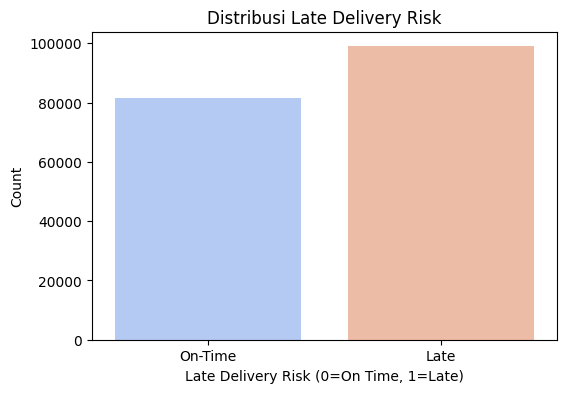

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x=df["Late_delivery_risk"], palette="coolwarm")
plt.title("Distribusi Late Delivery Risk")
plt.xlabel("Late Delivery Risk (0=On Time, 1=Late)")
plt.ylabel("Count")
plt.xticks([0,1], ["On-Time", "Late"])
plt.show()

###1. 4. 2. Perbandingan Days for Shipping (Real) dan Days for Shipment (Scheduled)

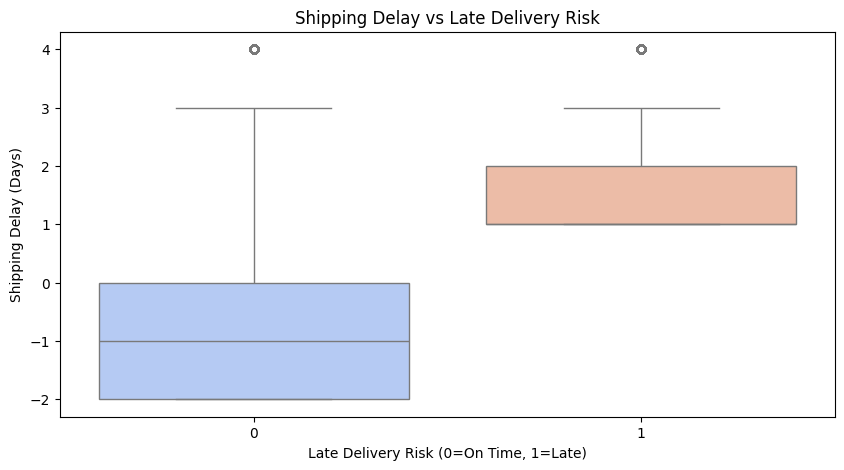

In [ ]:
df["shipping_delay"] = df["Days for shipping (real)"] - df["Days for shipment (scheduled)"]

plt.figure(figsize=(10,5))
sns.boxplot(x=df["Late_delivery_risk"], y=df["shipping_delay"], palette="coolwarm")
plt.title("Shipping Delay vs Late Delivery Risk")
plt.xlabel("Late Delivery Risk (0=On Time, 1=Late)")
plt.ylabel("Shipping Delay (Days)")
plt.show()

###1. 4. 3. Distribusi Late Delivery Risk berdasarkan Delivery Status

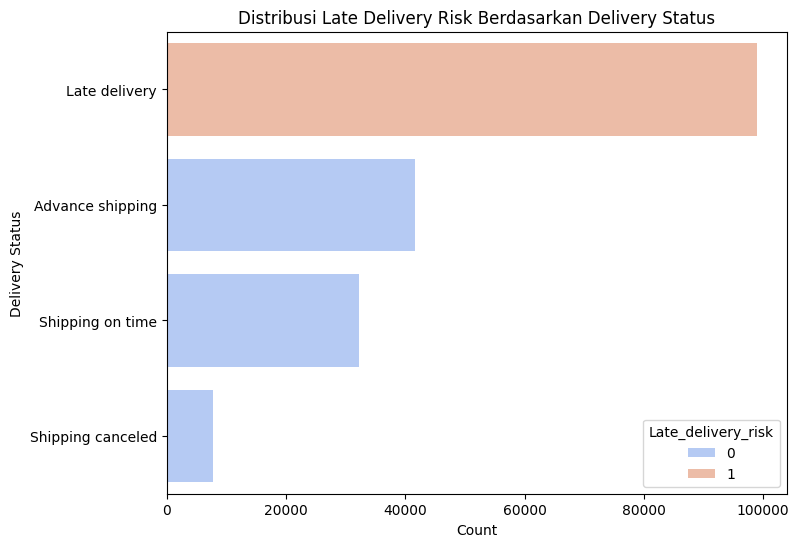

In [ ]:
# Late Delivery Risk berdasarkan Delivery Status
plt.figure(figsize=(8, 6))
sns.countplot(y=df["Delivery Status"], hue=df["Late_delivery_risk"], palette="coolwarm")
plt.title("Distribusi Late Delivery Risk Berdasarkan Delivery Status")
plt.xlabel("Count")
plt.ylabel("Delivery Status")
plt.legend(title="Late_delivery_risk", loc='lower right')
plt.show()

###1. 4. 4. Distribusi Late Delivery Risk berdasarkan Customer Segment

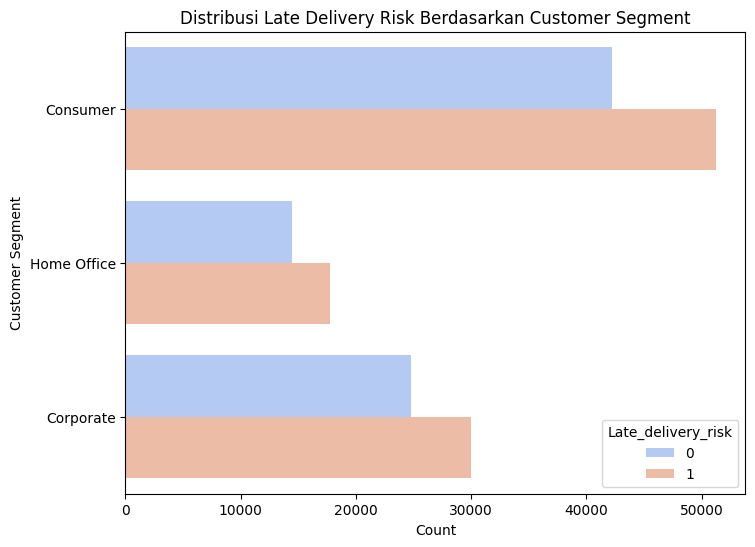

In [ ]:
# Late Delivery Risk berdasarkan Customer Segment
plt.figure(figsize=(8, 6))
sns.countplot(y=df["Customer Segment"], hue=df["Late_delivery_risk"], palette="coolwarm")
plt.title("Distribusi Late Delivery Risk Berdasarkan Customer Segment")
plt.xlabel("Count")
plt.ylabel("Customer Segment")
plt.legend(title="Late_delivery_risk", loc='lower right')
plt.show()

###1. 4. 5. Distribusi Late Delivery Risk berdasarkan Order Status

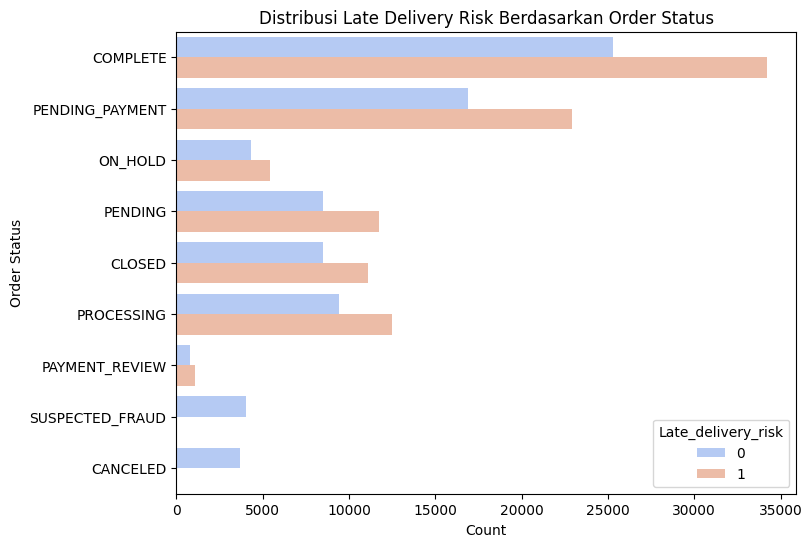

In [ ]:
# Late Delivery Risk berdasarkan Order Status
plt.figure(figsize=(8, 6))
sns.countplot(y=df["Order Status"], hue=df["Late_delivery_risk"], palette="coolwarm")
plt.title("Distribusi Late Delivery Risk Berdasarkan Order Status")
plt.xlabel("Count")
plt.ylabel("Order Status")
plt.legend(title="Late_delivery_risk", loc='lower right')
plt.show()

###1. 4. 6. Distribusi Late Delivery Risk berdasarkan Shipping Mode

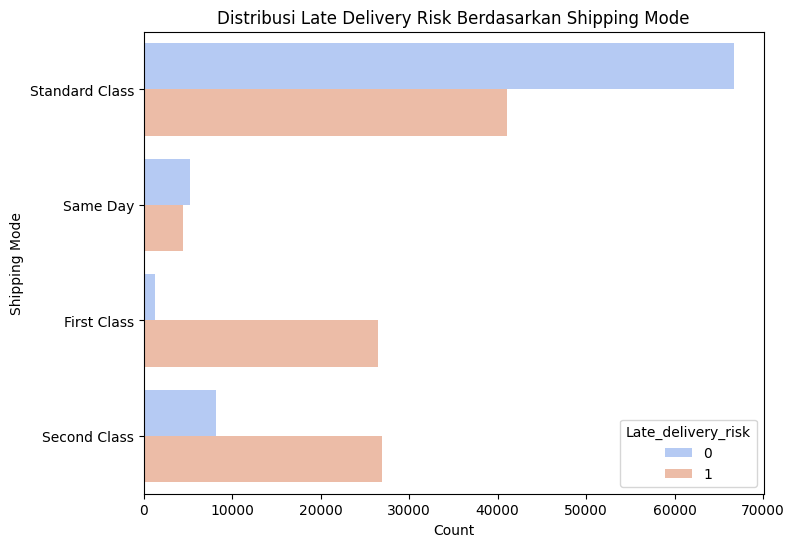

In [ ]:
# Distribusi Late Delivery Risk berdasarkan Shipping Mode
plt.figure(figsize=(8, 6))
sns.countplot(y=df["Shipping Mode"], hue=df["Late_delivery_risk"], palette="coolwarm")
plt.title("Distribusi Late Delivery Risk Berdasarkan Shipping Mode")
plt.xlabel("Count")
plt.ylabel("Shipping Mode")
plt.legend(title="Late_delivery_risk", loc='lower right')
plt.show()

###1. 4. 7. Distribusi Late Delivery Risk berdasarkan Order Region

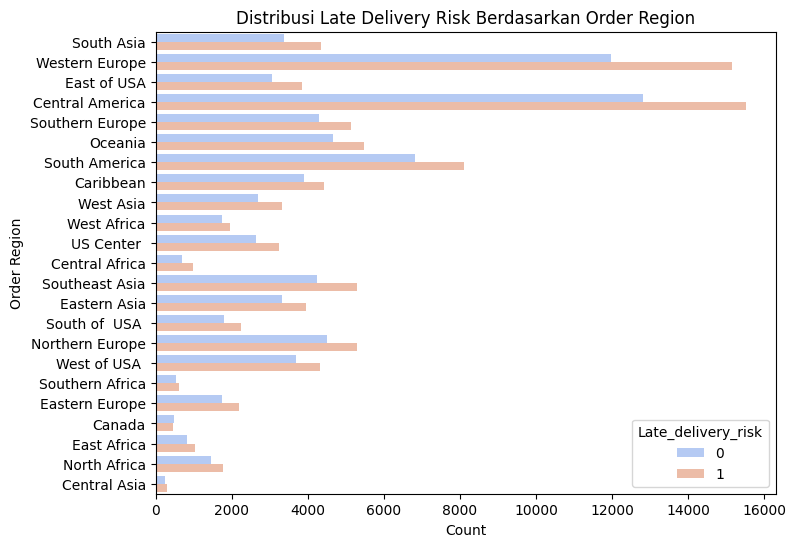

In [ ]:
# Distribusi Late Delivery Risk berdasarkan Order Region
plt.figure(figsize=(8, 6))
sns.countplot(y=df["Order Region"], hue=df["Late_delivery_risk"], palette="coolwarm")
plt.title("Distribusi Late Delivery Risk Berdasarkan Order Region")
plt.xlabel("Count")
plt.ylabel("Order Region")
plt.legend(title="Late_delivery_risk", loc='lower right')
plt.show()

###1. 4. 8. Tren Waktu Keterlambatan

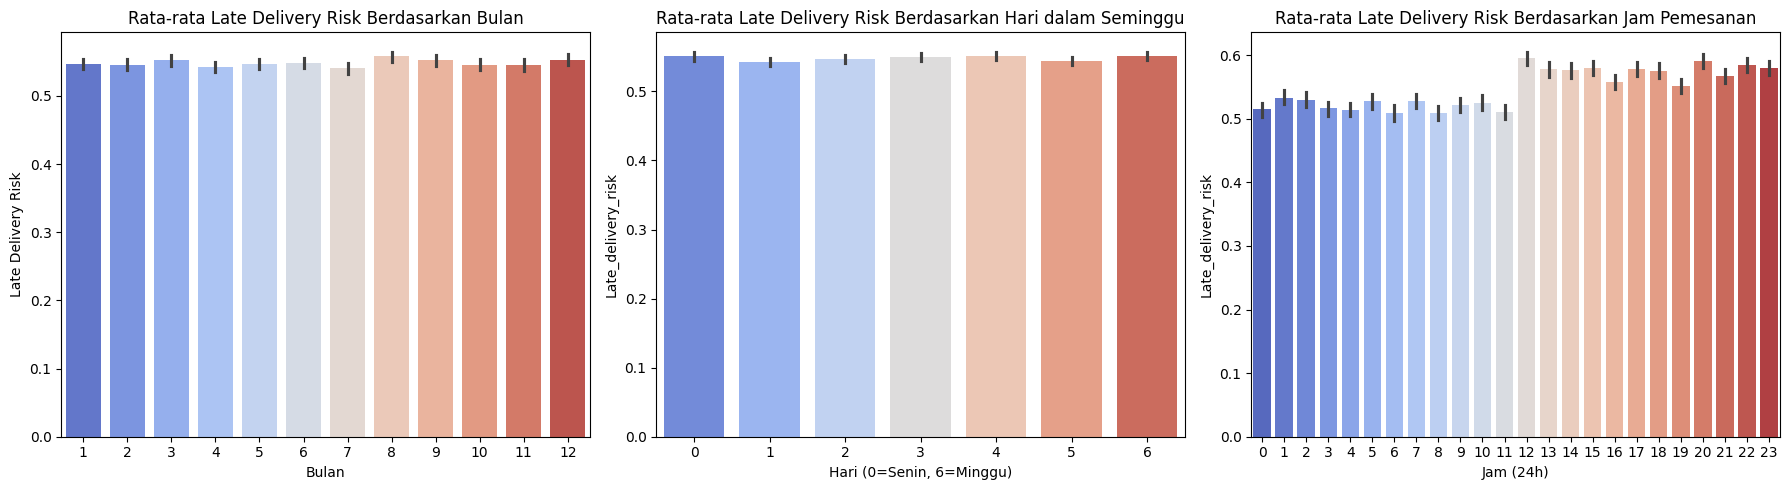

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18,5))

# Keterlambatan berdasarkan bulan
sns.barplot(x=df["order month"], y=df["Late_delivery_risk"], palette="coolwarm", ax=axes[0])
axes[0].set_title("Rata-rata Late Delivery Risk Berdasarkan Bulan")
axes[0].set_xlabel("Bulan")
axes[0].set_ylabel("Late Delivery Risk")

# Keterlambatan berdasarkan hari dalam seminggu
sns.barplot(x=df["order weekday"], y=df["Late_delivery_risk"], palette="coolwarm", ax=axes[1])
axes[1].set_title("Rata-rata Late Delivery Risk Berdasarkan Hari dalam Seminggu")
axes[1].set_xlabel("Hari (0=Senin, 6=Minggu)")

# Keterlambatan berdasarkan jam pemesanan
sns.barplot(x=df["order hour"], y=df["Late_delivery_risk"], palette="coolwarm", ax=axes[2])
axes[2].set_title("Rata-rata Late Delivery Risk Berdasarkan Jam Pemesanan")
axes[2].set_xlabel("Jam (24h)")

plt.tight_layout()
plt.show()

###1. 4. 9. Geospatial Analysis

In [ ]:
!pip install folium

In [ ]:
import folium
from folium.plugins import HeatMap

In [ ]:
# Filter hanya pengiriman yang terlambat
late_shipments = df[df["Late_delivery_risk"] == 1][["Latitude", "Longitude"]].dropna()

# Buat peta dengan titik pusat rata-rata lokasi dalam dataset
m = folium.Map(location=[late_shipments["Latitude"].mean(), late_shipments["Longitude"].mean()], zoom_start=5)

# Tambahkan heatmap ke peta
heat_data = late_shipments.values.tolist()
HeatMap(heat_data).add_to(m)

# Tampilkan peta
m

###1. 4. 10. Heatmap Korelasi

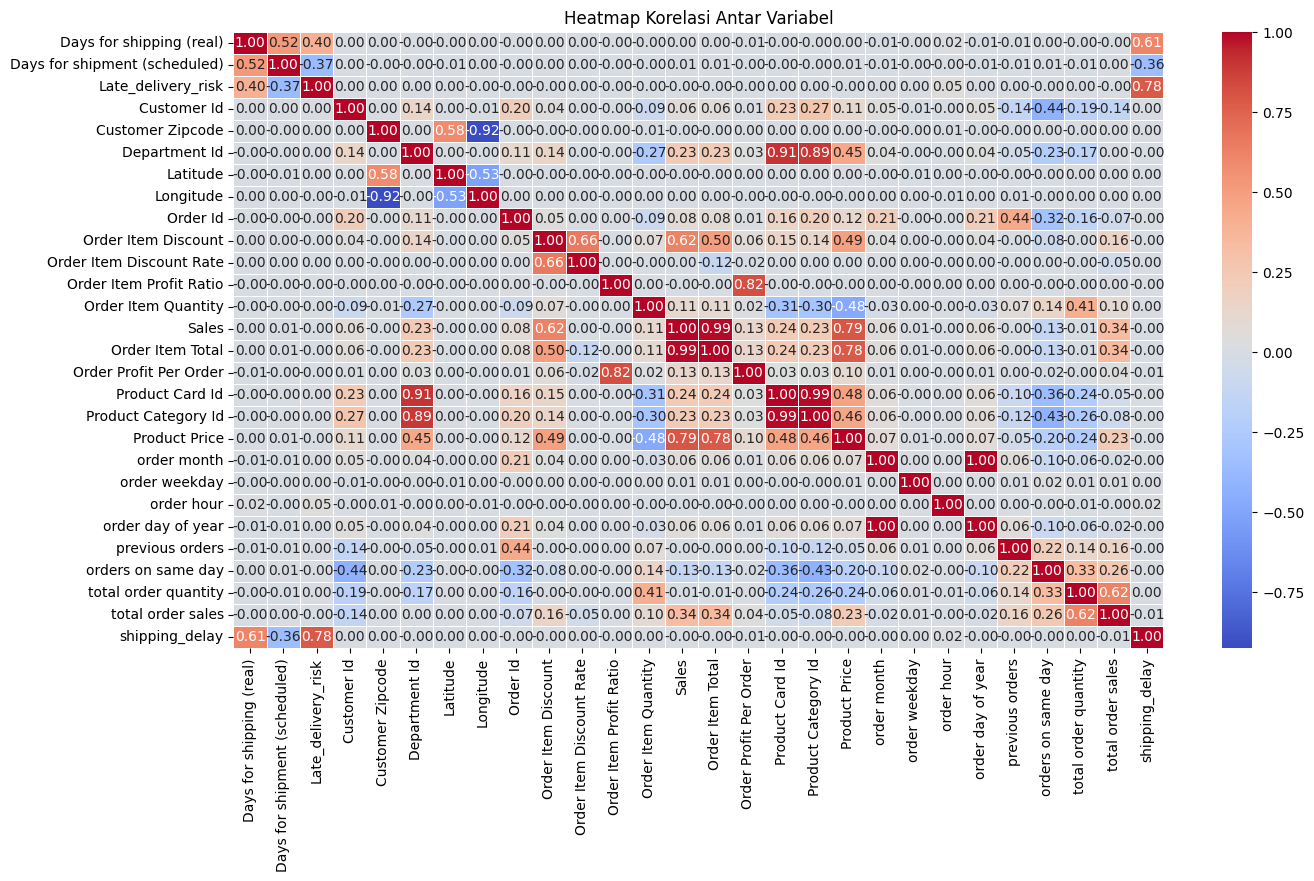

In [ ]:
# Pilih hanya kolom numerik untuk korelasi
numeric_df = df.select_dtypes(include=[np.number])

# Plot heatmap korelasi
plt.figure(figsize=(15, 8))
corrmap = numeric_df.corr()
sns.heatmap(corrmap, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()



---



#2. Feature Engineering

##2. 1. Import Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##2. 2. Handling Missing Values

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Masukkan File ID dari Google Drive
file_id = "1XdfHg6w0ONjqT4F9TPrCBSH464uEVqsG"
file_url = f"https://drive.google.com/uc?id={file_id}"

# Baca dataset langsung dari Google Drive
df = pd.read_csv(file_url, encoding='unicode_escape')

# Drop kolom yang kosong total
df.dropna(axis=1, how='all', inplace=True)

# Handling missing values dengan median (khusus numerik)
df.fillna(df.median(numeric_only=True), inplace=True)

##2. 3. Feature Engineering Output

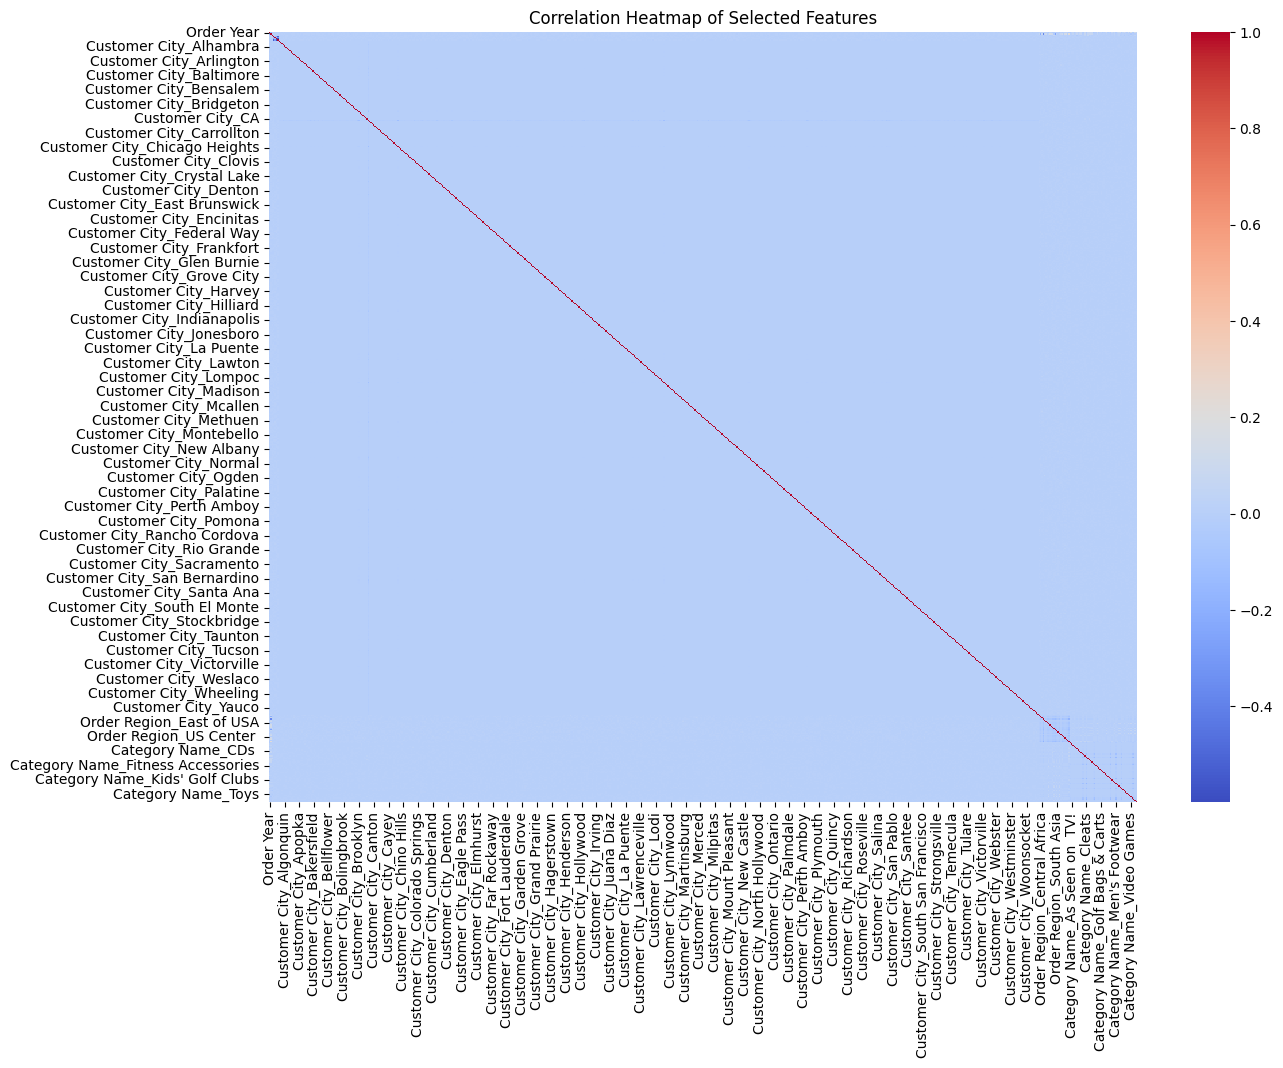

Feature Engineering Completed and Processed Dataset Saved!


In [ ]:
# Hitung perbedaan antara pengiriman aktual dan terjadwal sebagai fitur baru

df_cleaned = df.copy()  # Pastikan df ini berasal dari tahap Data Preparation yang sudah bersih
# Hitung perbedaan antara pengiriman aktual dan terjadwal sebagai fitur baru
df_cleaned['Shipment_Delay'] = df_cleaned['Days for shipping (real)'] - df_cleaned['Days for shipment (scheduled)']

# Target keterlambatan berdasarkan Shipment_Delay
df_cleaned['Late_Delivery'] = (df_cleaned['Shipment_Delay'] > 0).astype(int)

# Ekstrak fitur waktu untuk analisis demand
df_cleaned['Order Date'] = pd.to_datetime(df_cleaned['order date (DateOrders)'])
df_cleaned['Order Year'] = df_cleaned['Order Date'].dt.year
df_cleaned['Order Month'] = df_cleaned['Order Date'].dt.month
df_cleaned['Order Day'] = df_cleaned['Order Date'].dt.day

# Pilih kolom yang relevan untuk pemodelan
selected_columns = [
  #  'Shipment_Delay',
    'Shipping Mode',
    'Customer City',
    'Order Region',
    'Category Name',
    'Order Year',
    'Order Month',
    'Order Day'
]

X = df_cleaned[selected_columns]
y = df_cleaned['Late_Delivery']

# Encoding categorical features
X_encoded = pd.get_dummies(X, columns=['Shipping Mode', 'Customer City', 'Order Region', 'Category Name'])

# Scaling numerical features
scaler = StandardScaler()
# X_encoded[['Shipment_Delay', 'Order Year', 'Order Month', 'Order Day']] = scaler.fit_transform(X_encoded[['Shipment_Delay', 'Order Year', 'Order Month', 'Order Day']])
X_encoded[['Order Year', 'Order Month', 'Order Day']] = scaler.fit_transform(X_encoded[[ 'Order Year', 'Order Month', 'Order Day']])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# Visualisasi korelasi antar fitur terpilih
plt.figure(figsize=(14, 10))
sns.heatmap(X_encoded.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap of Selected Features")
plt.show()

# Save processed dataset to Google Drive (sesuaikan path sesuai kebutuhan)
processed_df = X_encoded.copy()
processed_df['Late_Delivery'] = y
processed_df.to_csv("/content/drive/MyDrive/FF_processed_dataset.csv", index=False)

print("Feature Engineering Completed and Processed Dataset Saved!")



---



#3. Machine Learning Modelling (Compare)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Training Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Training XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Prediksi pada data uji
rf_pred = rf_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

# Perhitungan akurasi
accuracy_rf = accuracy_score(y_test, rf_pred)
accuracy_xgb = accuracy_score(y_test, xgb_pred)

print(f"Akurasi Random Forest: {accuracy_rf:.4f}")
print(f"Akurasi XGBoost: {accuracy_xgb:.4f}")

# Classification Report
print("\nClassification Report - Random Forest:\n", classification_report(y_test, rf_pred))
print("\nClassification Report - XGBoost:\n", classification_report(y_test, xgb_pred))

Akurasi Random Forest: 0.8149
Akurasi XGBoost: 0.7171

Classification Report - Random Forest:
               precision    recall  f1-score   support

           0       0.77      0.82      0.79     15399
           1       0.86      0.81      0.83     20705

    accuracy                           0.81     36104
   macro avg       0.81      0.81      0.81     36104
weighted avg       0.82      0.81      0.82     36104


Classification Report - XGBoost:
               precision    recall  f1-score   support

           0       0.62      0.88      0.73     15399
           1       0.87      0.59      0.71     20705

    accuracy                           0.72     36104
   macro avg       0.75      0.74      0.72     36104
weighted avg       0.76      0.72      0.72     36104



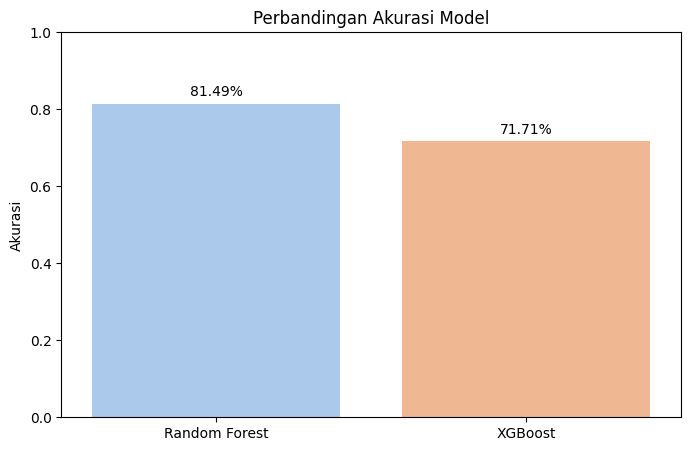

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Buat dictionary untuk menyimpan akurasi model
accuracies = {
    'Random Forest': accuracy_rf,
    'XGBoost': accuracy_xgb
}

# Plot perbandingan akurasi
plt.figure(figsize=(8, 5))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='pastel')

plt.title("Perbandingan Akurasi Model")
plt.ylabel("Akurasi")
plt.ylim(0, 1)

# Menampilkan nilai akurasi di atas bar
for index, value in enumerate(accuracies.values()):
    plt.text(index, value + 0.02, f'{value:.2%}', ha='center')

plt.show()

## Memilih Random Forest dengan akurasi yang lebih baik

In [ ]:
import joblib

# Simpan model ke Google Drive
joblib.dump(rf_model, '/content/drive/MyDrive/random_forest_best.pkl')

print("Model berhasil disimpan!")

Model berhasil disimpan!




---



#4. Machine Learning Modelling using Random Forest


##4. 1. Searching Best Parameters

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Definisikan parameter yang akan diuji
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi Random Forest
rf = RandomForestClassifier(random_state=42)

# Gunakan RandomizedSearchCV untuk mempercepat tuning
random_search = RandomizedSearchCV(rf, param_distributions=param_dist,
                                   n_iter=10, cv=3, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train)

# Gunakan model terbaik
best_rf = random_search.best_estimator_

# Tampilkan hasil terbaik
print("Best Parameters:", random_search.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': None}


###4. 1. 1. Confusion Matrix

Akurasi Model Terbaik: 0.7604697540438733
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.87      0.76     15399
           1       0.88      0.68      0.76     20705

    accuracy                           0.76     36104
   macro avg       0.77      0.77      0.76     36104
weighted avg       0.79      0.76      0.76     36104



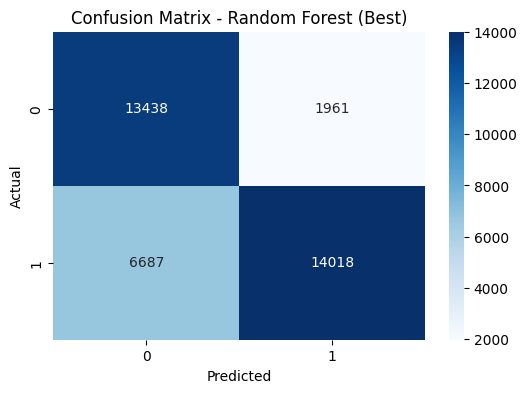

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prediksi menggunakan model terbaik
y_pred_best = best_rf.predict(X_test)

# Tampilkan hasil akurasi
print("Akurasi Model Terbaik:", accuracy_score(y_test, y_pred_best))

# Tampilkan classification report
print("Classification Report:\n", classification_report(y_test, y_pred_best))

# Visualisasi confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest (Best)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

###4. 1. 2. Feature Importance

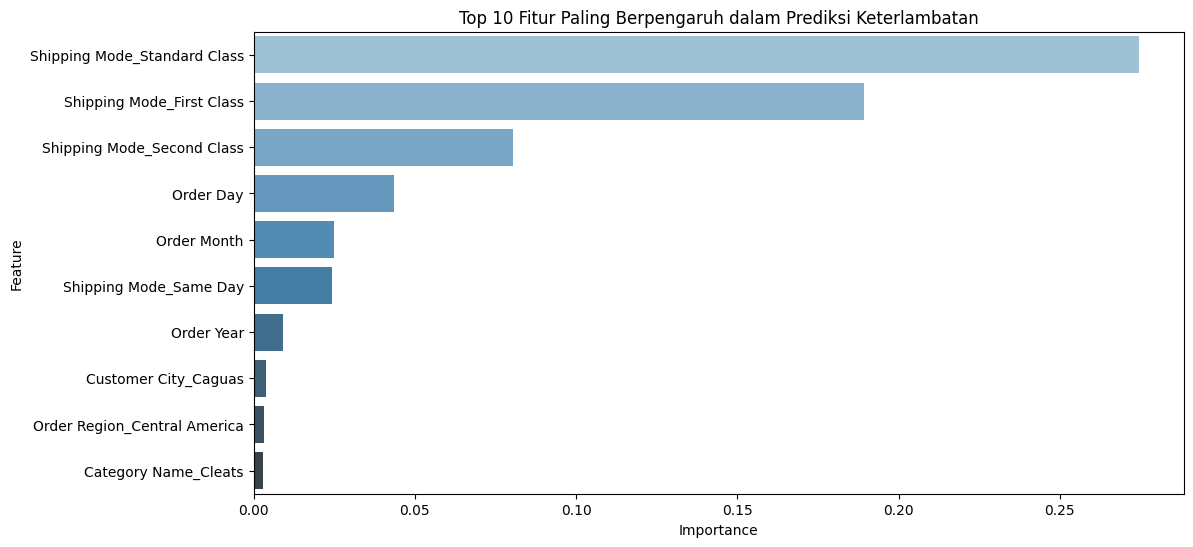

In [ ]:
# Ambil fitur yang paling penting
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Visualisasi fitur yang paling berpengaruh
plt.figure(figsize=(12, 6))
sns.barplot(y=X_train.columns[indices][:10], x=importances[indices][:10], palette="Blues_d")
plt.title("Top 10 Fitur Paling Berpengaruh dalam Prediksi Keterlambatan")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

##4. 2. Testing

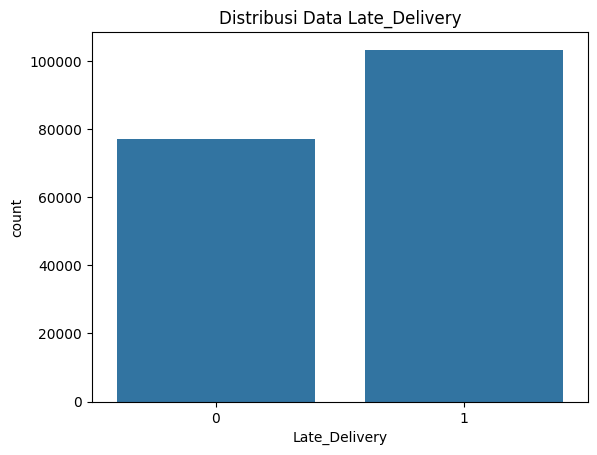

Late_Delivery
1    0.572793
0    0.427207
Name: proportion, dtype: float64


In [ ]:
import seaborn as sns

# Visualisasi distribusi target class
sns.countplot(x=y)
plt.title("Distribusi Data Late_Delivery")
plt.show()

# Cek proporsi data kelas
print(y.value_counts(normalize=True))

###4. 2. 1. Checking the Accuracy

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Prediksi menggunakan model terbaik
rf_pred = rf_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

# Perhitungan Akurasi
accuracy_rf = accuracy_score(y_test, rf_pred)
accuracy_xgb = accuracy_score(y_test, xgb_pred)

print(f"Akurasi Random Forest: {accuracy_rf:.4f}")
print(f"Akurasi XGBoost: {accuracy_xgb:.4f}")

# Classification Report
print("\nClassification Report - Random Forest:\n", classification_report(y_test, rf_pred))
print("\nClassification Report - XGBoost:\n", classification_report(y_test, xgb_pred))

Akurasi Random Forest: 0.8149
Akurasi XGBoost: 0.7171

Classification Report - Random Forest:
               precision    recall  f1-score   support

           0       0.77      0.82      0.79     15399
           1       0.86      0.81      0.83     20705

    accuracy                           0.81     36104
   macro avg       0.81      0.81      0.81     36104
weighted avg       0.82      0.81      0.82     36104


Classification Report - XGBoost:
               precision    recall  f1-score   support

           0       0.62      0.88      0.73     15399
           1       0.87      0.59      0.71     20705

    accuracy                           0.72     36104
   macro avg       0.75      0.74      0.72     36104
weighted avg       0.76      0.72      0.72     36104



###4. 2. 2. Checking the Confusion Matrix

Classification Report - Random Forest:
               precision    recall  f1-score   support

           0       0.77      0.82      0.79     15399
           1       0.86      0.81      0.83     20705

    accuracy                           0.81     36104
   macro avg       0.81      0.81      0.81     36104
weighted avg       0.82      0.81      0.82     36104

Classification Report - XGBoost:
               precision    recall  f1-score   support

           0       0.62      0.88      0.73     15399
           1       0.87      0.59      0.71     20705

    accuracy                           0.72     36104
   macro avg       0.75      0.74      0.72     36104
weighted avg       0.76      0.72      0.72     36104



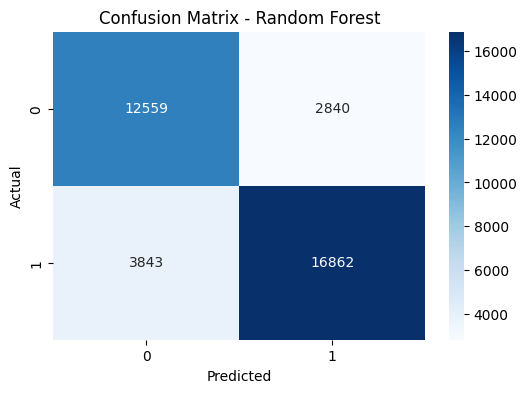

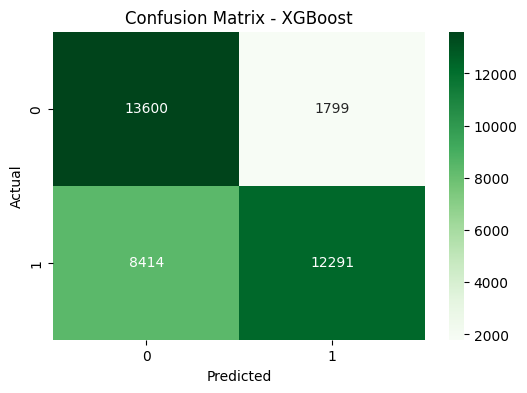

In [ ]:
print("Classification Report - Random Forest:\n", classification_report(y_test, rf_pred))
print("Classification Report - XGBoost:\n", classification_report(y_test, xgb_pred))
# Confusion Matrix untuk Random Forest
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Confusion Matrix untuk XGBoost
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, xgb_pred), annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

###4. 2. 3. Checking the Feature Importance

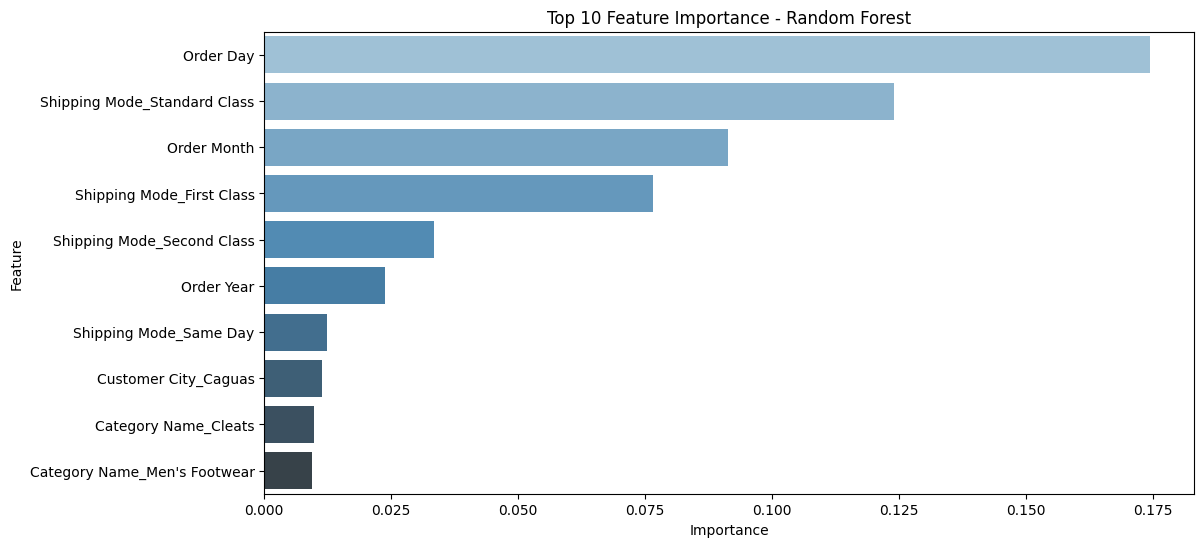

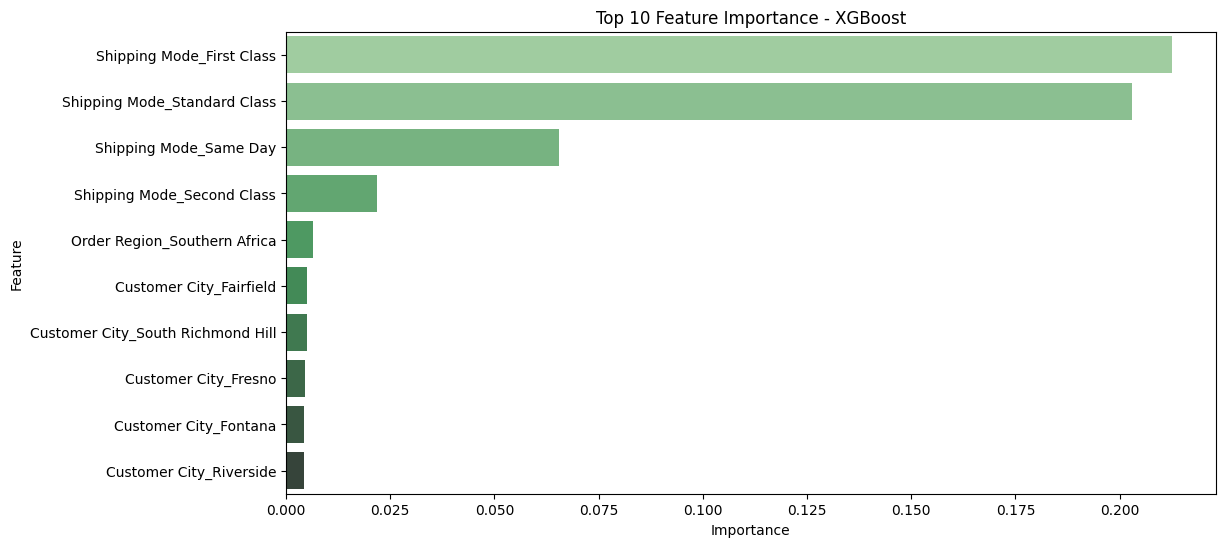

In [ ]:
# Feature Importance untuk Random Forest
importances_rf = rf_model.feature_importances_
indices_rf = np.argsort(importances_rf)[::-1]

plt.figure(figsize=(12, 6))
sns.barplot(y=X_train.columns[indices_rf][:10], x=importances_rf[indices_rf][:10], palette="Blues_d")
plt.title("Top 10 Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Feature Importance untuk XGBoost
importances_xgb = xgb_model.feature_importances_
indices_xgb = np.argsort(importances_xgb)[::-1]

plt.figure(figsize=(12, 6))
sns.barplot(y=X_train.columns[indices_xgb][:10], x=importances_xgb[indices_xgb][:10], palette="Greens_d")
plt.title("Top 10 Feature Importance - XGBoost")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

##4. 3. ROC-AUC Curve

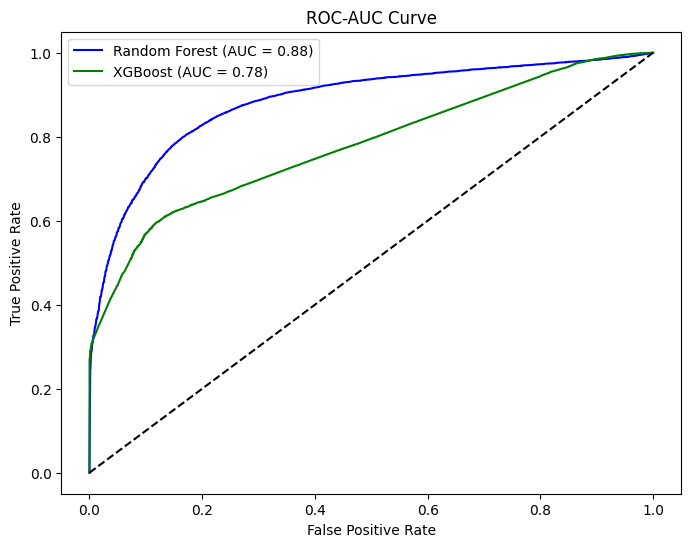

In [ ]:
from sklearn.metrics import roc_curve, auc

# Prediksi probabilitas untuk Random Forest
y_pred_rf_prob = rf_model.predict_proba(X_test)[:, 1]

# Prediksi probabilitas untuk XGBoost
y_pred_xgb_prob = xgb_model.predict_proba(X_test)[:, 1]

# Hitung ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf_prob)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_xgb_prob)

# Hitung AUC Score
auc_rf = auc(fpr_rf, tpr_rf)
auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})", color='blue')
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {auc_xgb:.2f})", color='green')

# Tambahkan diagonal reference line
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend()
plt.show()

##4.4 OOB Error Analysis - Random Forest

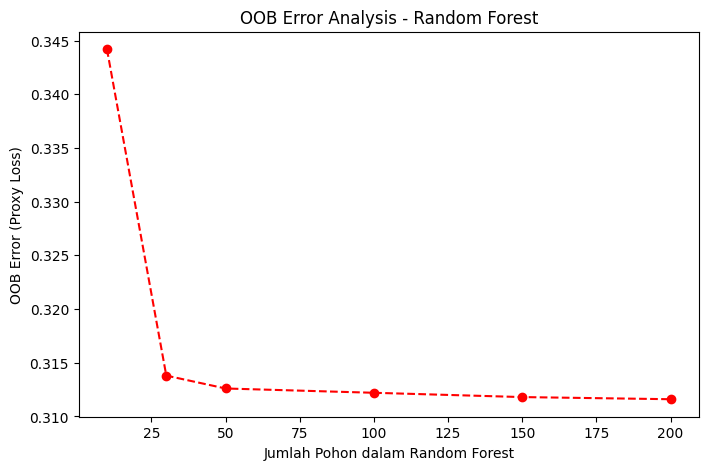

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample

# Ambil subset kecil dari X_train dan y_train untuk mempercepat training
X_train_sample, y_train_sample = resample(X_train, y_train, n_samples=5000, random_state=42)

# Pilihan jumlah pohon (estimators) yang signifikan (tidak perlu step kecil)
n_estimators_range = [10, 30, 50, 100, 150, 200]
oob_errors = []

# Training menggunakan multiprocessing untuk mempercepat
rf_model_oob = RandomForestClassifier(oob_score=True, warm_start=True, n_jobs=-1, random_state=42)

for n in n_estimators_range:
    rf_model_oob.n_estimators = n
    rf_model_oob.fit(X_train_sample, y_train_sample)  # Melanjutkan training tanpa reset

    if hasattr(rf_model_oob, 'oob_score_'):
        oob_errors.append(1 - rf_model_oob.oob_score_)
    else:
        oob_errors.append(None)

# OOB Error Analysis - Random Forest
plt.figure(figsize=(8, 5))
plt.plot(n_estimators_range, oob_errors, marker='o', linestyle='dashed', color='red')
plt.xlabel("Jumlah Pohon dalam Random Forest")
plt.ylabel("OOB Error (Proxy Loss)")
plt.title("OOB Error Analysis - Random Forest")
plt.show()



---



#5.  Prediction


In [ ]:
import joblib
import pandas as pd

# Load model terbaik untuk prediksi
rf_model = joblib.load('/content/drive/MyDrive/random_forest_best.pkl')

# Contoh data baru (Wilayah East, Shipping Mode Standard Class)
data_baru_1 = {
    'Shipping Mode': ['Standard Class'],
    'Customer City': ['New York'],
    'Order Region': ['East'],
    'Category Name': ['Office Supplies'],
    'Order Year': [2025],
    'Order Month': [7],  # Bulan Juli
    'Order Day': [15]
}

# Konversi ke DataFrame
data_baru_df_1 = pd.DataFrame(data_baru_1)

# Preprocessing sesuai training (One-Hot Encoding)
data_baru_encoded_1 = pd.get_dummies(data_baru_df_1)
data_baru_encoded_1 = data_baru_encoded_1.reindex(columns=X_encoded.columns, fill_value=0)

# Scaling (Gunakan scaler dari training)
data_baru_encoded_1[['Order Year', 'Order Month', 'Order Day']] = scaler.transform(
    data_baru_encoded_1[['Order Year', 'Order Month', 'Order Day']]
)

# Prediksi apakah pengiriman akan terlambat atau tidak
prediksi_baru_1 = rf_model.predict(data_baru_encoded_1)
pred_proba_new_1 = rf_model.predict_proba(data_baru_encoded_1)[:, 1]  # Probabilitas kelas keterlambatan

# Output hasil prediksi
if prediksi_baru_1[0] == 1:
    print(f"Prediksi: Pengiriman akan TERLAMBAT dengan probabilitas {pred_proba_new_1[0]:.2%}.")
else:
    print(f"Prediksi: Pengiriman TIDAK AKAN TERLAMBAT dengan probabilitas {1 - pred_proba_new_1[0]:.2%}.")

Prediksi: Pengiriman TIDAK AKAN TERLAMBAT dengan probabilitas 73.00%.


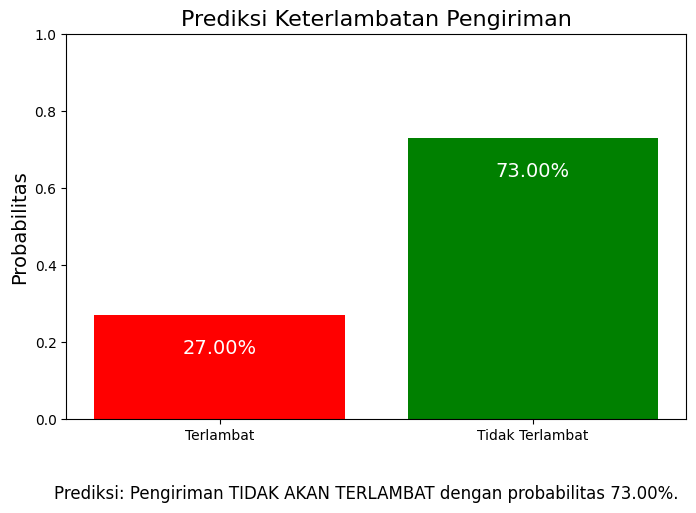

In [ ]:
import matplotlib.pyplot as plt

# Data hasil prediksi (gunakan hasil prediksi dari kode yang sudah dijalankan sebelumnya)
labels = ['Terlambat', 'Tidak Terlambat']
prob_terlambat = pred_proba_new_1[0]
prob_tidak_terlambat = 1 - pred_proba_new_1[0]
probabilities = [prob_terlambat, prob_tidak_terlambat]

# Membuat grafik batang
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, probabilities, color=['red', 'green'])
plt.title('Prediksi Keterlambatan Pengiriman', fontsize=16)
plt.ylabel('Probabilitas', fontsize=14)
plt.ylim(0, 1)

# Menambahkan label probabilitas di atas batang
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() - 0.1,
             f'{bar.get_height():.2%}', ha='center', color='white', fontsize=14)

# Menampilkan teks hasil prediksi di bawah grafik
hasil_prediksi = (f"Prediksi: Pengiriman {'AKAN TERLAMBAT' if prediksi_baru_1[0] == 1 else 'TIDAK AKAN TERLAMBAT'} "
                  f"dengan probabilitas {max(probabilities):.2%}.")
plt.figtext(0.5, -0.05, hasil_prediksi, ha='center', fontsize=12, wrap=True)

plt.show()
